# Auto Geometric Transform Function (GmTVector)

**By: Bijan Sayyafzadeh (b.sayyaf@yahoo.com)**


url: https://github.com/BijanSeif/TOpsPy


With special Thanks to **Dr. Silvia Mazzoni & Prof. Michael Scott** Because of their supports. 

### What is Presented:
On this Notbook the usage of **GmTVector** Function that is provided for **geometric transformation vector calculation** is described and some examples are presented. The hypothesises and considered rules also described. Instead of calculating the Opensees Geometric Tranformation Vector, By only defining the angle of cross section you can get the required vector. To find out more, read this NoteBook!.


### How to get acces to this function:
This function is one the Functions that are presented in the **TOpsPy** PYPI package for **openseespy**.\
First you have to install the TOpsPy package: **pip install topspy**\
Then import the modules in its modeling subpackage: **import topspy.modeling as bjm**\
Finally, simply call it in you code: **bjm.GmTVector(Node1,Node2,Theta)**


To get more familiar with this function read this jupyter notebook or also run **print(help(bjm.GmTVector))** on your Python.

In [2]:
import topspy.modeling as bjm
import openseespy.opensees as ops
import opsvis as opvis
import eSEESminiPy as slv
import matplotlib.pyplot as plt
import markdown
%matplotlib notebook
import numpy as np
import math
import pandas as pd



def Drawm(Nodei, Nodej, Theta):
    '''
    This Function is for Drawing Elements To investigate 
    Usage of the GmTVector and its Backgroung Concepts
    Continue From the next cell
    
    '''
    
    ops.wipe()
    ops.model('basic', '-ndm',3)

    #Nodes
    Node1=Nodei
    Node2=Nodej

    ops.node(1, *Node1)
    ops.node(2, *Node2)

    #Lateral Nodes for Uderstanding the Space
    ops.node(3, *[0,10,10])
    ops.node(4, *[10,10,10])
    ops.node(5, *[0,0,10])
    ops.node(6, *[0,10,0])


    transfTag=1
    vecxz=bjm.GmTVector(Node1,Node2,Theta)
    ops.geomTransf('Linear', transfTag, *vecxz)


    eleTag=1
    eleNodes=[1,2]
    Area=1
    E_mod=1
    G_mod=1
    Jxx=1
    Iy=1
    Iz=1
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)
    eleTag=2

    # Lateral Elements for Understanding the Space
    eleNodes=[3,4]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)
    eleTag=3
    eleNodes=[3,5]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)
    eleTag=4
    eleNodes=[3,6]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)
    
    #slv.drawModel()
    
    opvis.plot_model()


    fig_wi_he = 20., 20.
    b, h= 0.8, 1.5
    ele_shapes = {1: ['rect', [b, h]]}

    opvis.plot_extruded_shapes_3d(ele_shapes, fig_wi_he=fig_wi_he)

    plt.show()

    

     
     
 

Considered Rules:
- The Horizontal Axis of The Cross Section is its Main Axis
- When you imagine the view from the first node of the element to the seond node of the element, the initial direction of the element main axis (with $\theta=0$) is considered to the left. 
- Rotations are clockwise and in Degree
- For columns the cross section main axis is considered in 1st horizontal coordinate direction if the first node is located above the second nodeand and for vise versa it is in the negative direction of the 1st coordinate. 

Let Watch Some Examples.

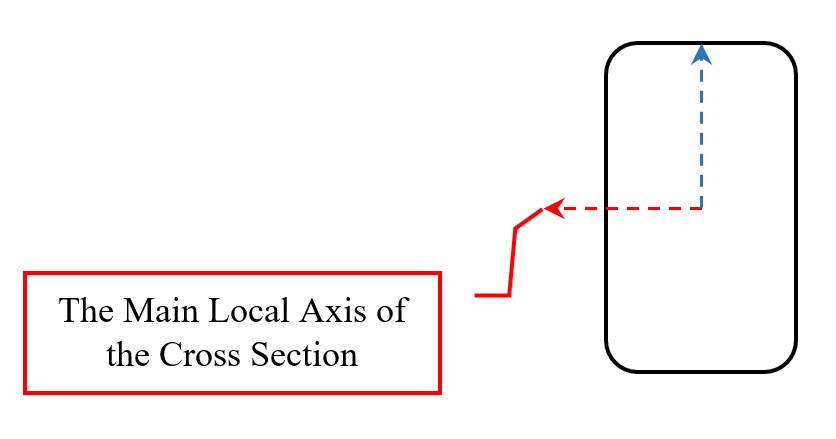

**1st Example:**

In the first Example we draw a line from node1 in y=0 to node2 in y=10. **If we look from node1 position to node2 position** according the mentioned rules (**Main axis of cross section is in the left side**), the **cross section main axis of the element should be seen in opposite x axis direction**. Watch it:

<IPython.core.display.Javascript object>


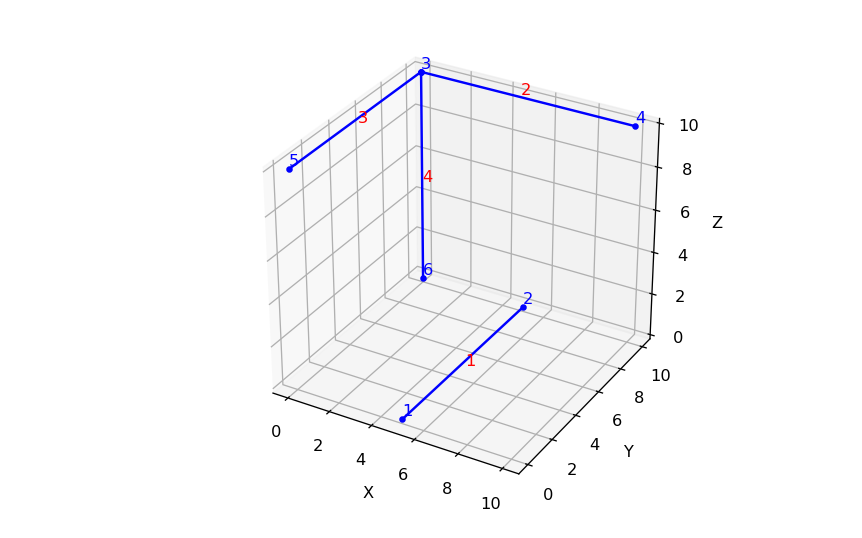

<IPython.core.display.Javascript object>


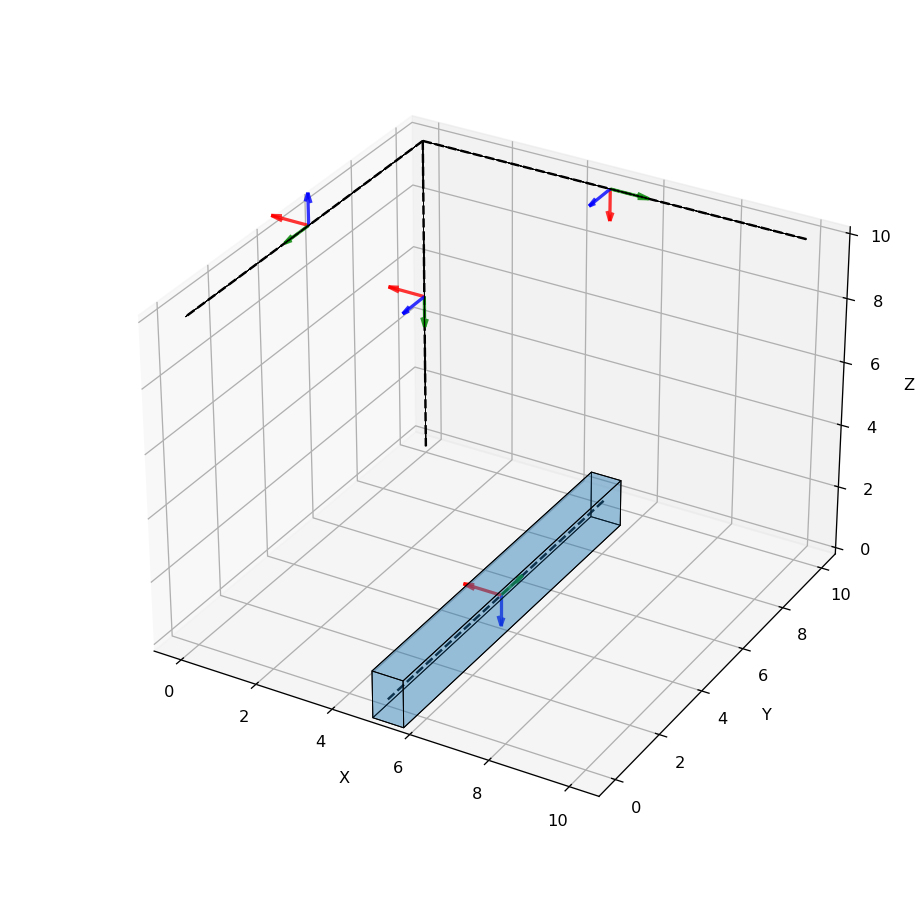

In [3]:
Node1=[5,0,0]
Node2=[5,10,0]
Theta=0
Drawm(Node1, Node2, Theta)

**Conitue of 1st Example:**

Now if we draw the previous beam from y=10 to y=0 (subtitute the 1st and 2nd node) so **If we look from node1 position to node2 position** according the mentioned rules (**Main axis of cross section is in the left side**), the **cross section main axis of the element should be seen in x axis positive direction**. Watch it:

<IPython.core.display.Javascript object>


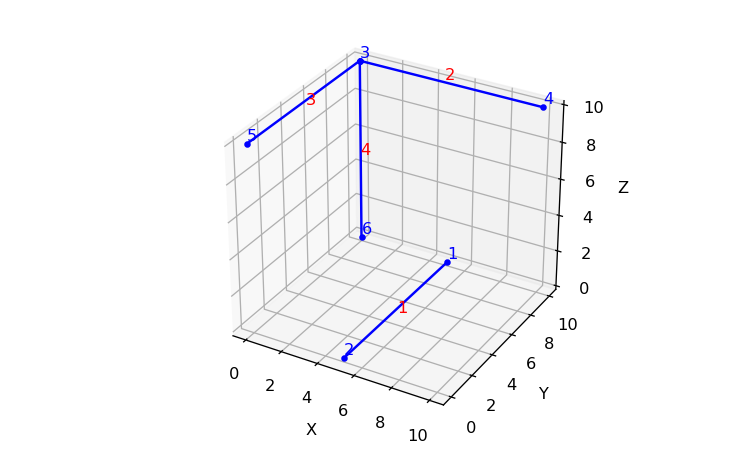

<IPython.core.display.Javascript object>


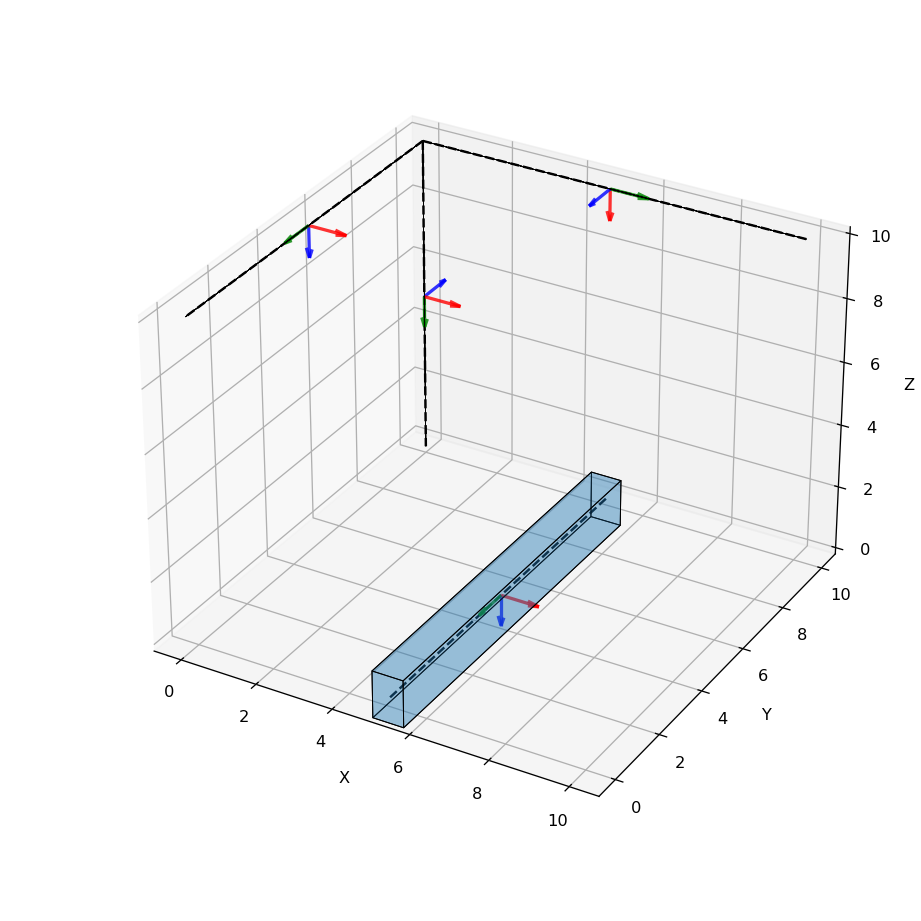

In [4]:
Node1=[5,10,0]
Node2=[5,0,0]
Theta=0
Drawm(Node1, Node2, Theta)

**2nd Example:**

Like 1st example we check the results for xDirection:

<IPython.core.display.Javascript object>


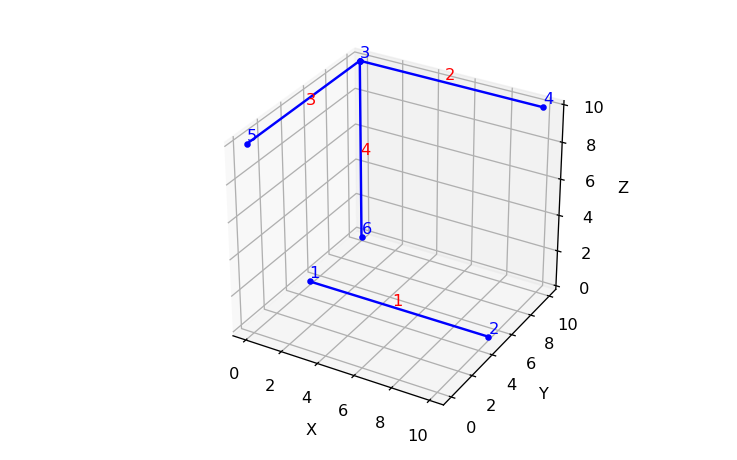

<IPython.core.display.Javascript object>


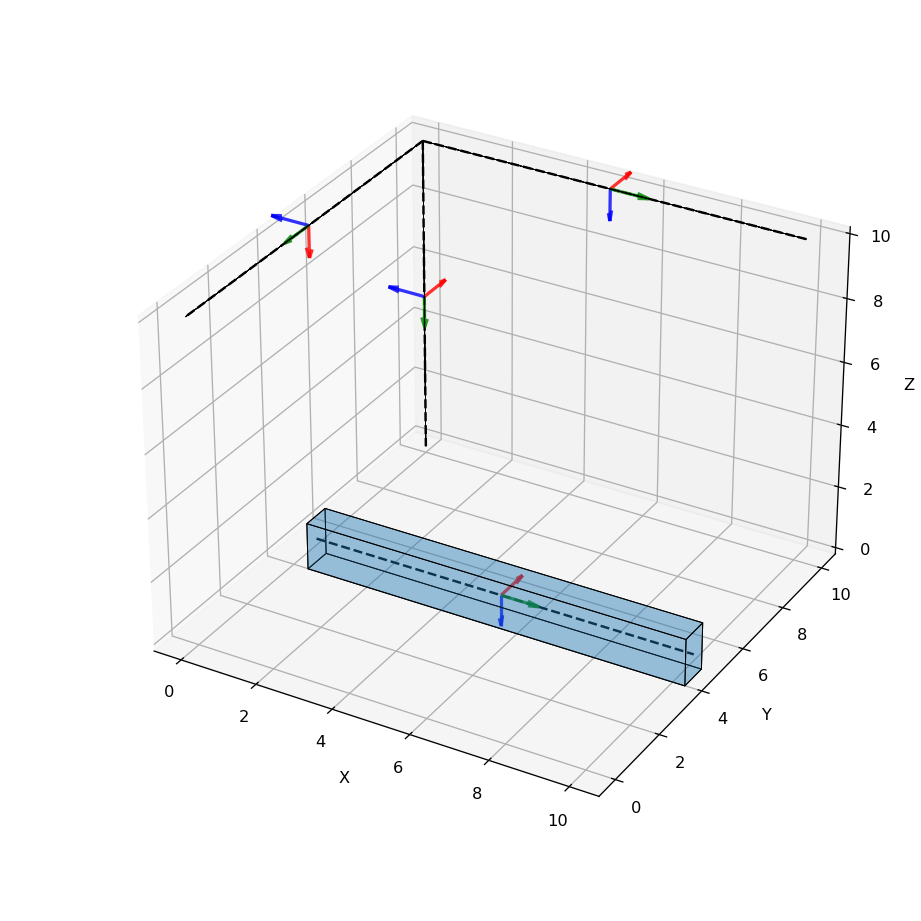

In [5]:
Node1=[0,5,0]
Node2=[10,5,0]
Theta=0
Drawm(Node1, Node2, Theta)

<IPython.core.display.Javascript object>


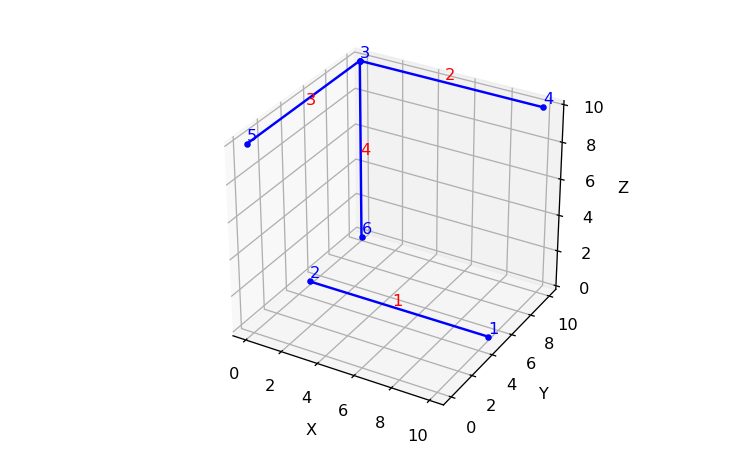

<IPython.core.display.Javascript object>


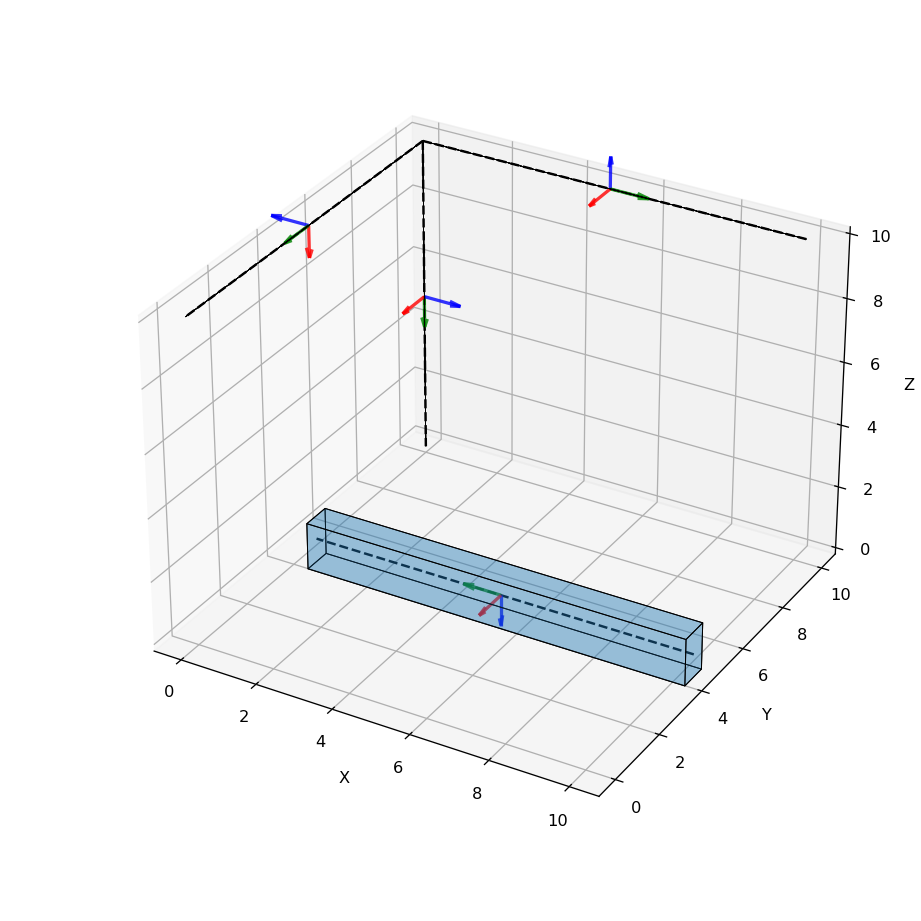

In [6]:
Node1=[10,5,0]
Node2=[0,5,0]
Theta=0
Drawm(Node1, Node2, Theta)

**3rd Example:**

Like two previous examples we check the results for an incline element. Wath it: 

<IPython.core.display.Javascript object>


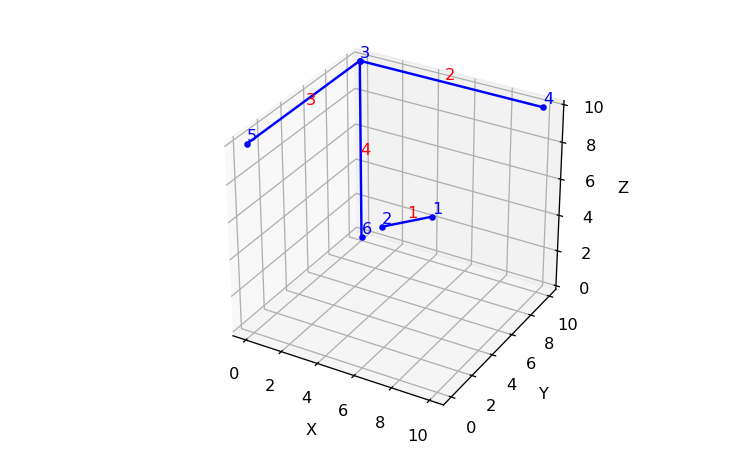

<IPython.core.display.Javascript object>


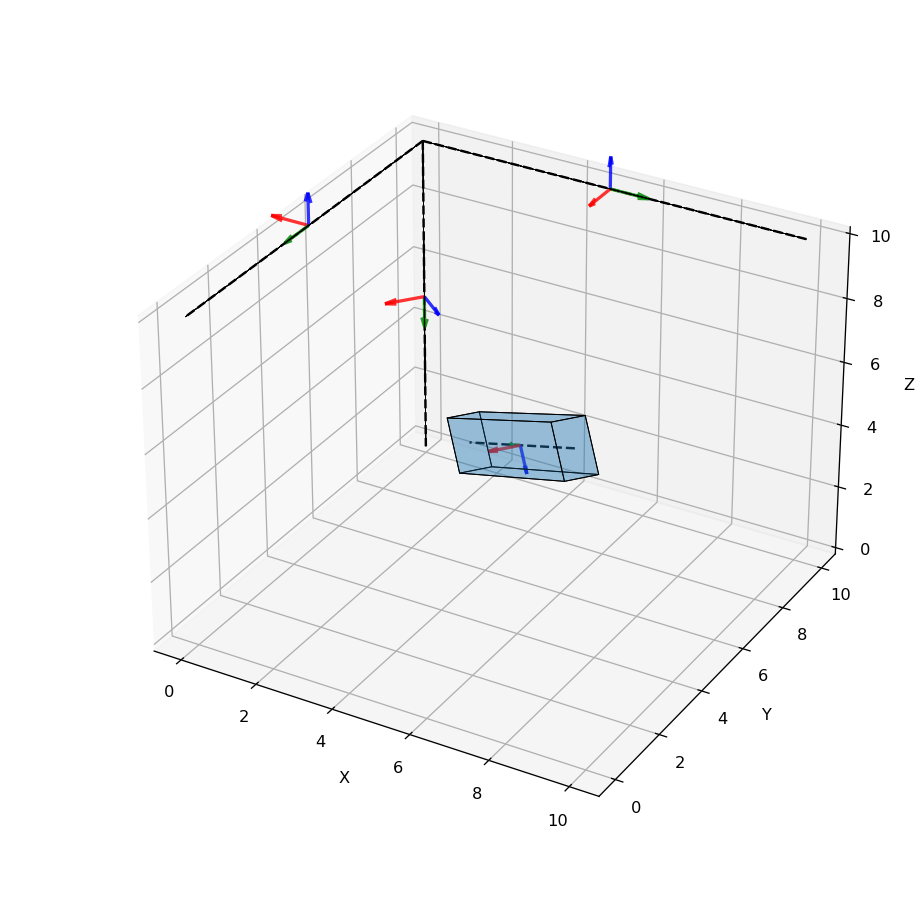

In [7]:
Node1=[8,3,7]
Node2=[3,7,3]
Theta=0
Drawm(Node1, Node2, Theta)

<IPython.core.display.Javascript object>


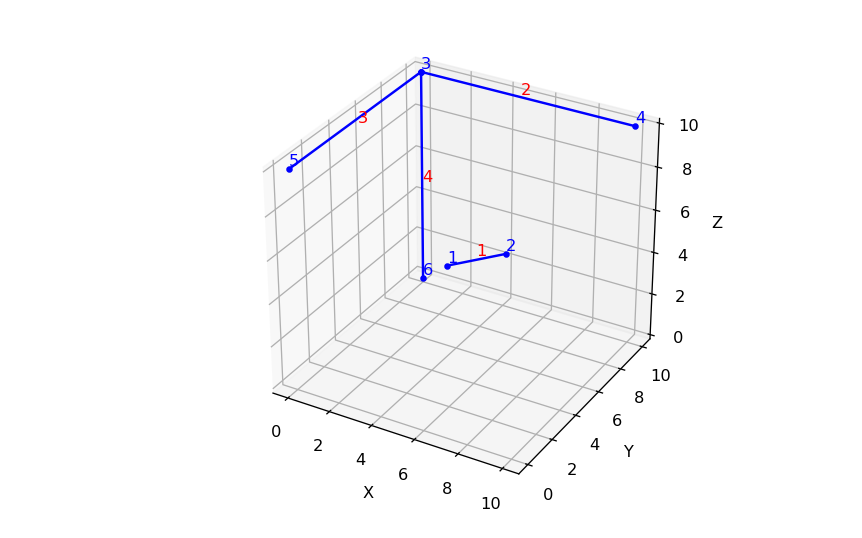

<IPython.core.display.Javascript object>


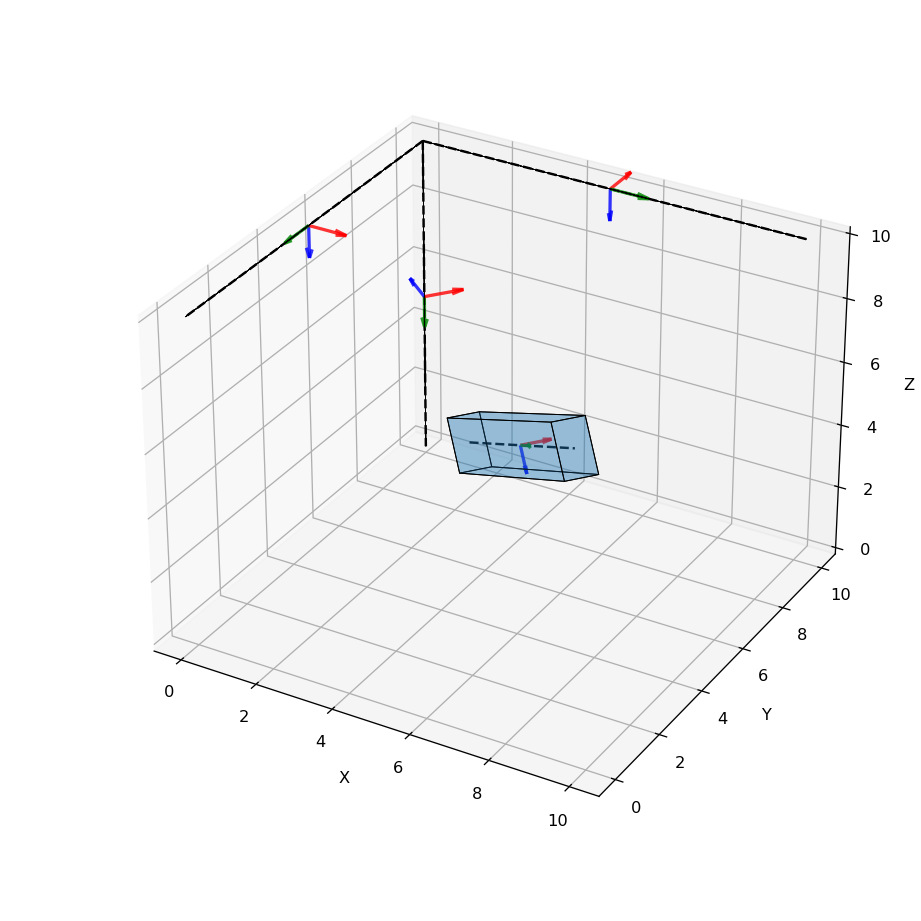

In [8]:
Node1=[3,7,3]
Node2=[8,3,7]
Theta=0
Drawm(Node1, Node2, Theta)

# Rotations

As said before in rules part, all the rotations are in clockwise direction. it means that **when we look from Node1 to Node2 position** As seid the cross sectio main axis is in the left side and **its rotation is clockwise**. Here are some examples with different rotation angles ($\theta$).

**1st Exapmle with $\theta=0$ :**

<IPython.core.display.Javascript object>


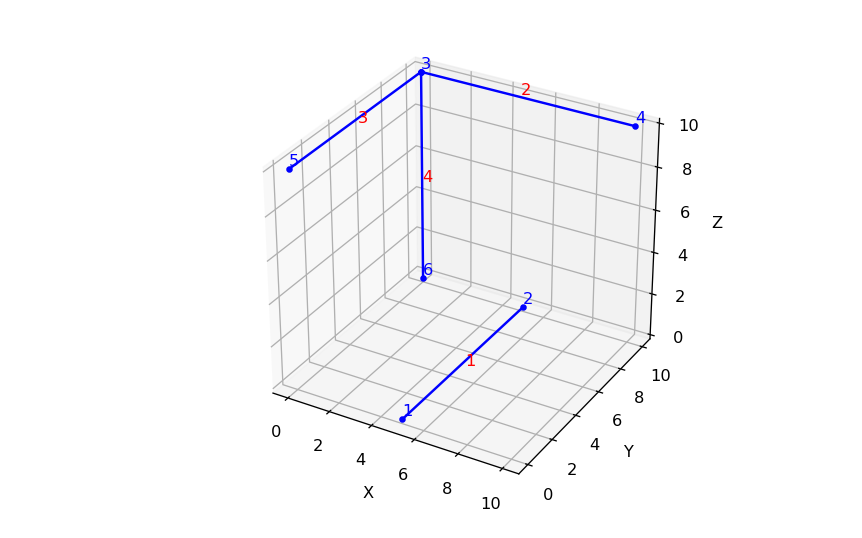

<IPython.core.display.Javascript object>


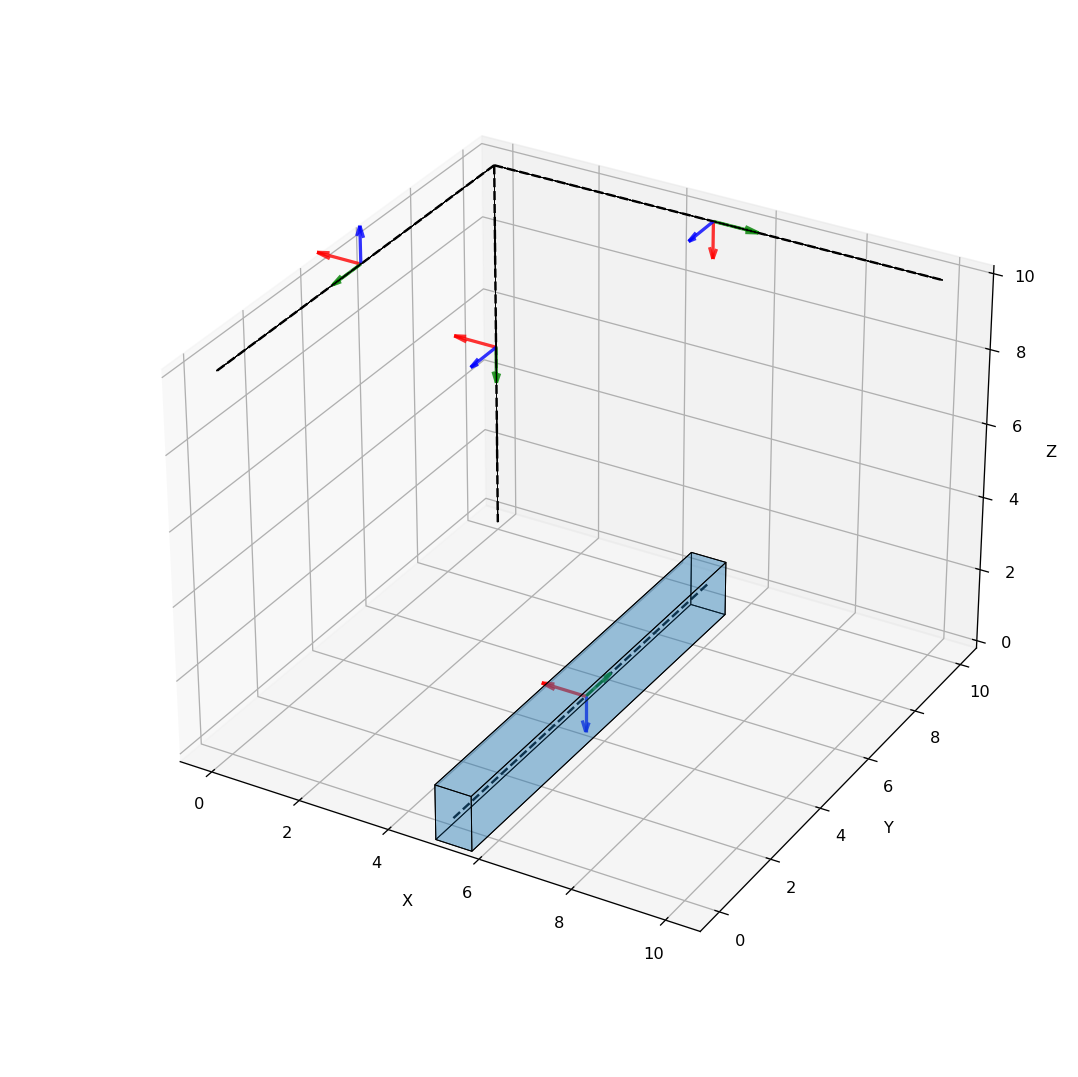

In [9]:
Node1=[5,0,0]
Node2=[5,10,0]
Theta=0
Drawm(Node1, Node2, Theta)

**Continiue of 1st Exapmle with $\theta=45$ :**

<IPython.core.display.Javascript object>


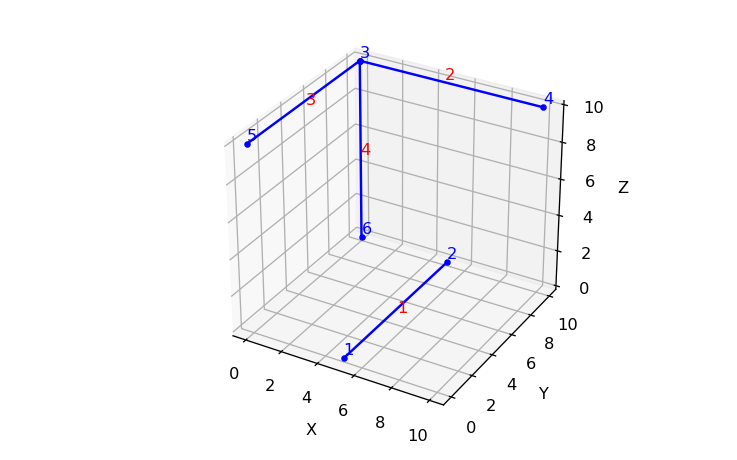

<IPython.core.display.Javascript object>


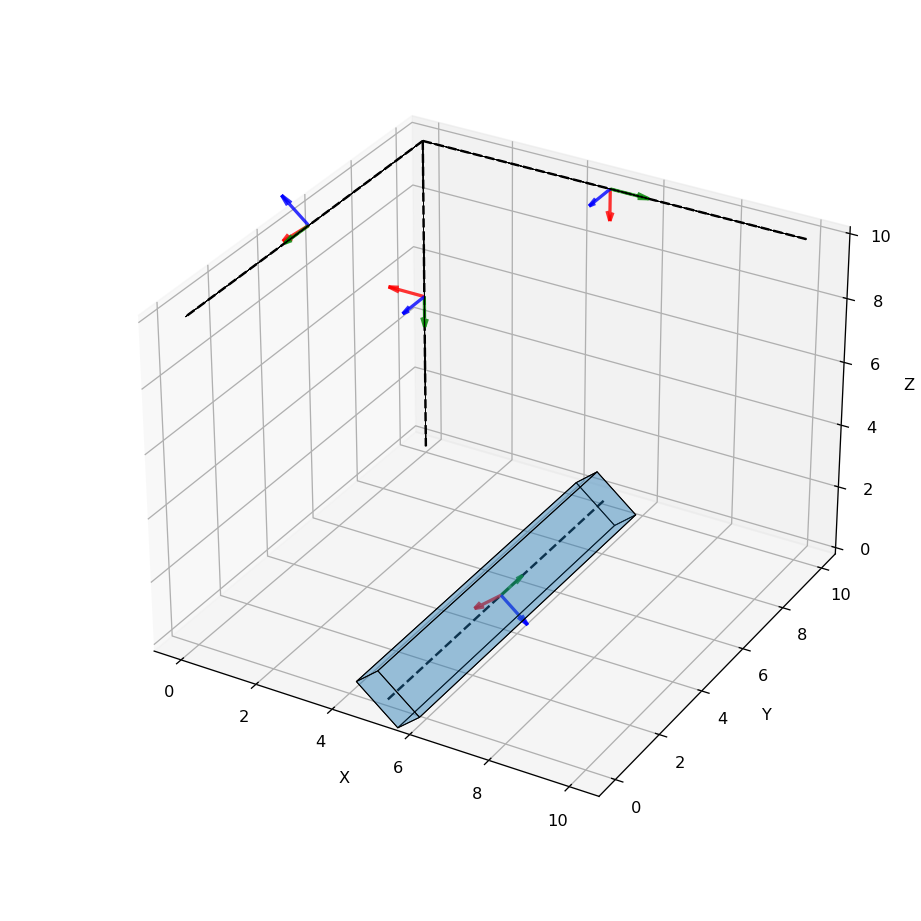

In [10]:
Node1=[5,0,0]
Node2=[5,10,0]
Theta=45
Drawm(Node1, Node2, Theta)

**Continiue of 1st Exapmle with $\theta=90$ :**

<IPython.core.display.Javascript object>


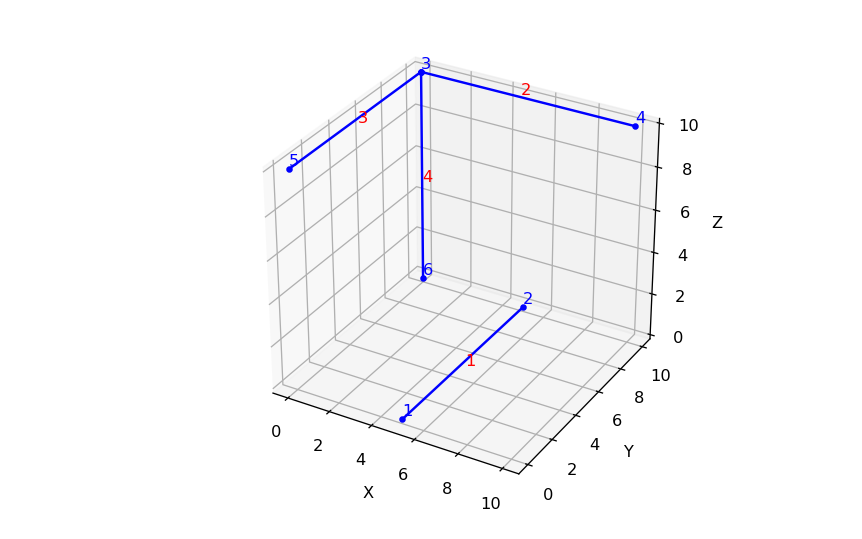

<IPython.core.display.Javascript object>


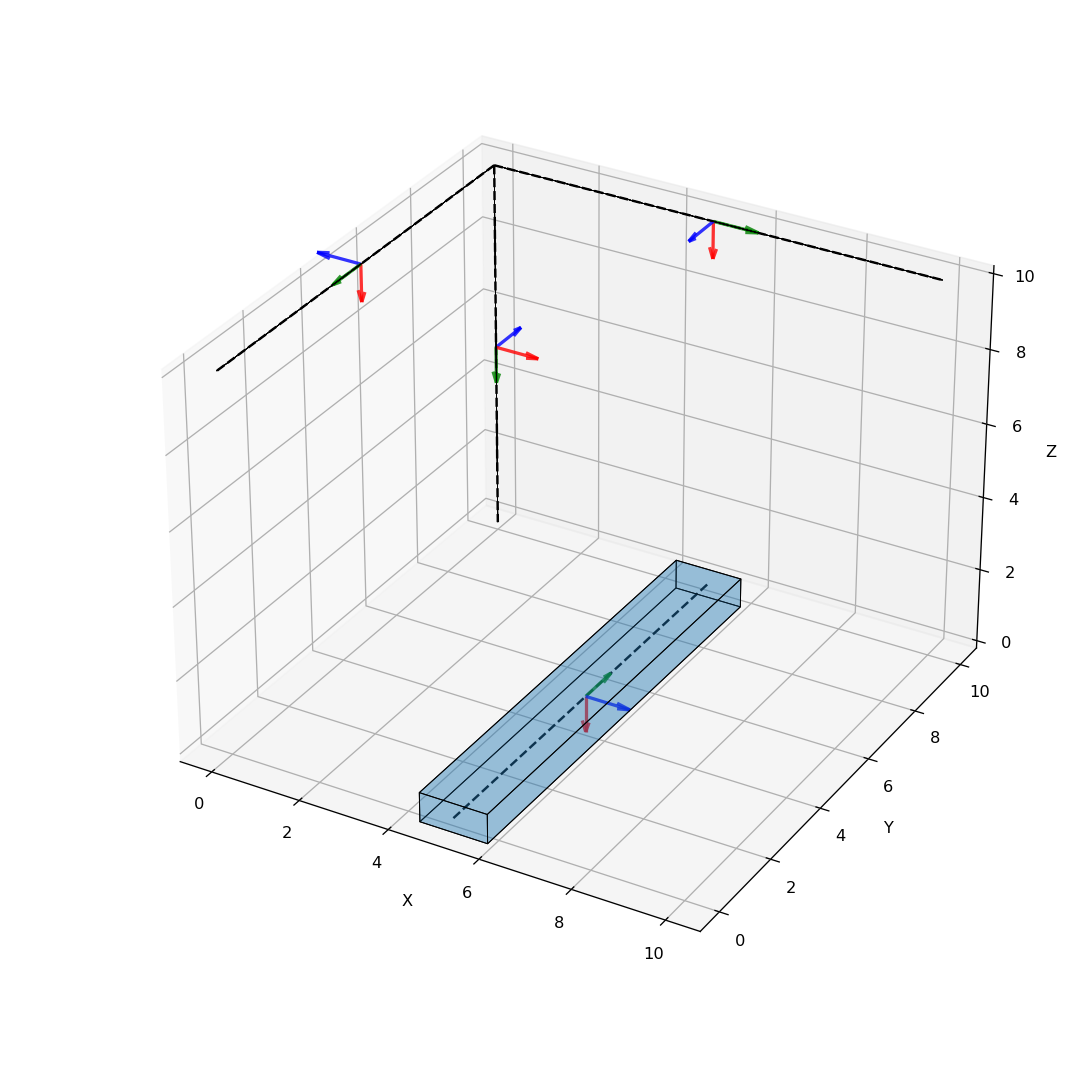

In [11]:
Node1=[5,0,0]
Node2=[5,10,0]
Theta=90
Drawm(Node1, Node2, Theta)

**2nd Exapmle:**

With $\theta=0$ and subtituting the Example 1 nodes location.

<IPython.core.display.Javascript object>


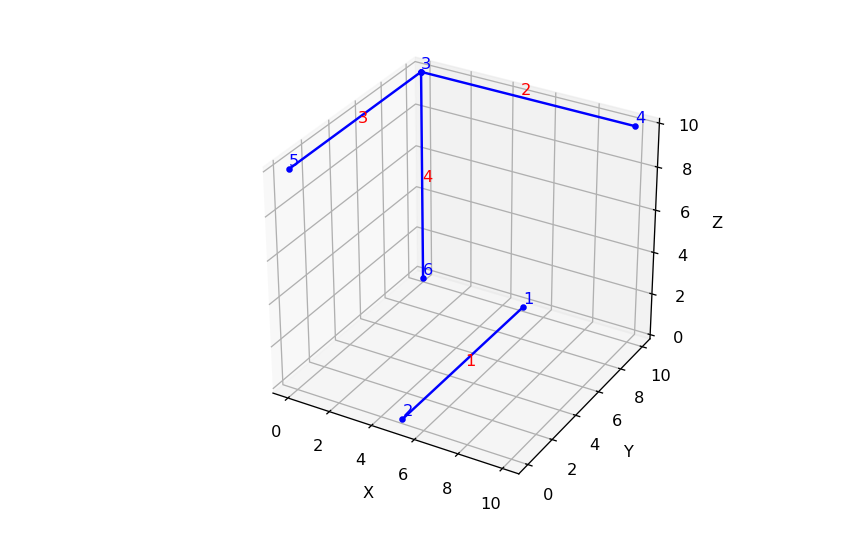

<IPython.core.display.Javascript object>


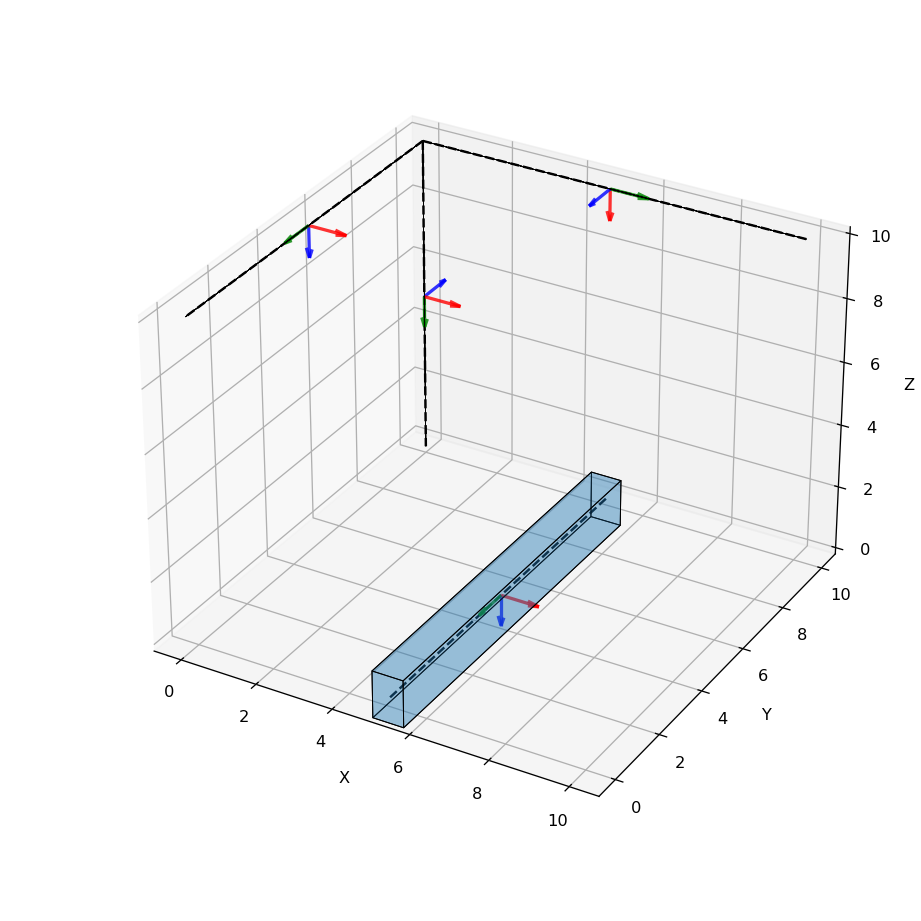

In [12]:
Node1=[5,10,0]
Node2=[5,0,0]
Theta=0
Drawm(Node1, Node2, Theta)

**Continiue of 2nd Exapmle with $\theta=45$ :**

c:\users\rose\appdata\local\programs\python\python38\lib\site-packages\opsvis\opsvis.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(fig_wi/2.54, fig_he/2.54))


<IPython.core.display.Javascript object>


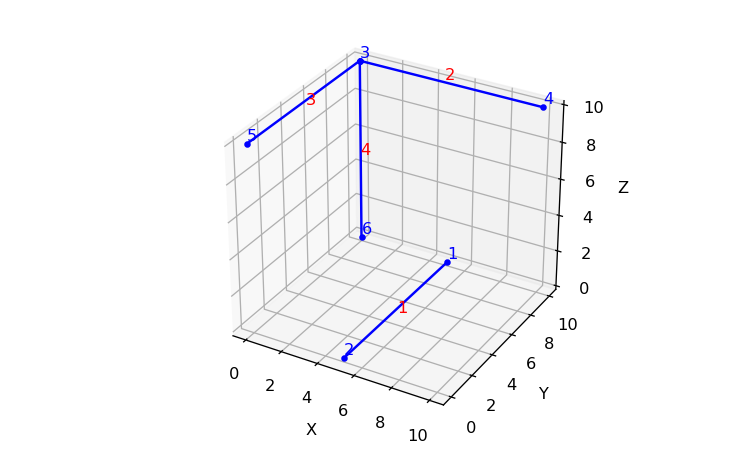

<IPython.core.display.Javascript object>


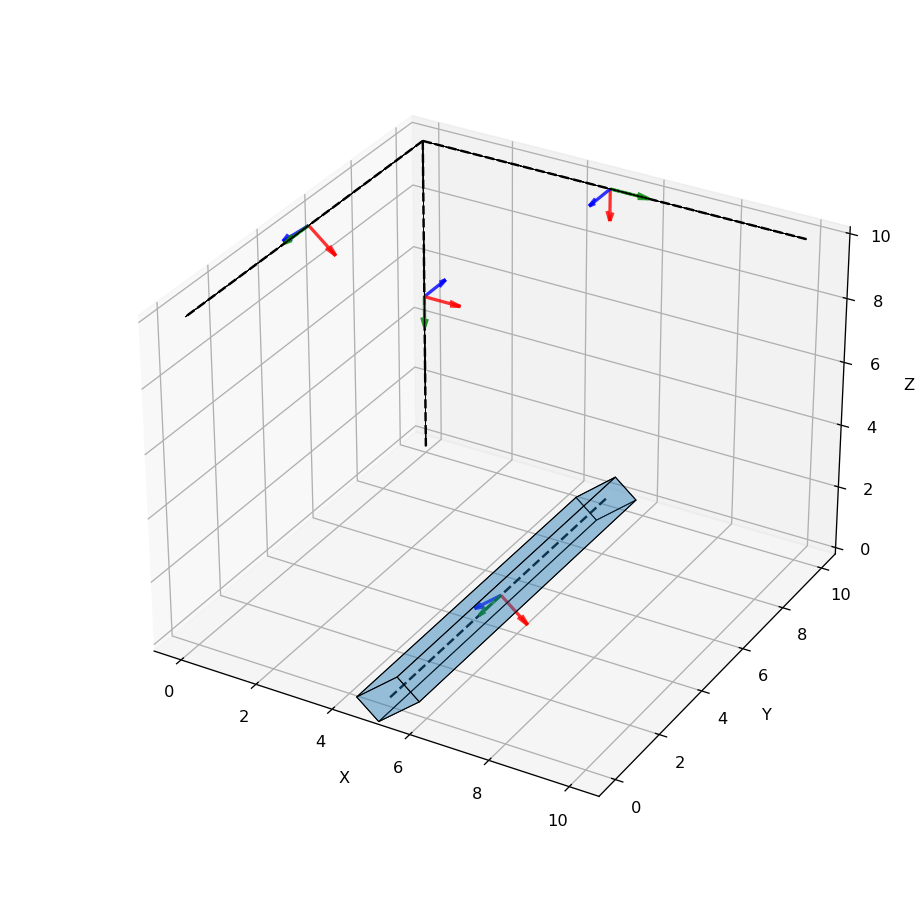

In [13]:
Node1=[5,10,0]
Node2=[5,0,0]
Theta=45
Drawm(Node1, Node2, Theta)

**Continiue of 2nd Exapmle with $\theta=90$ :**

<IPython.core.display.Javascript object>


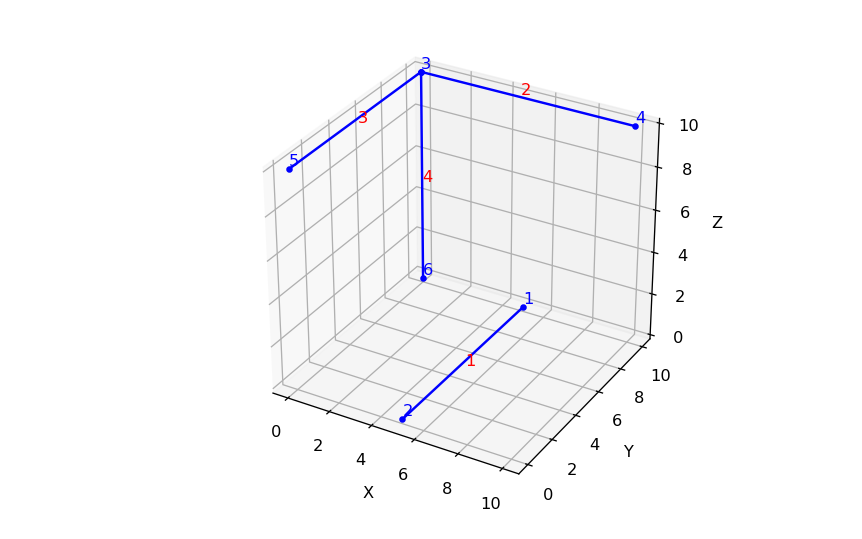

<IPython.core.display.Javascript object>


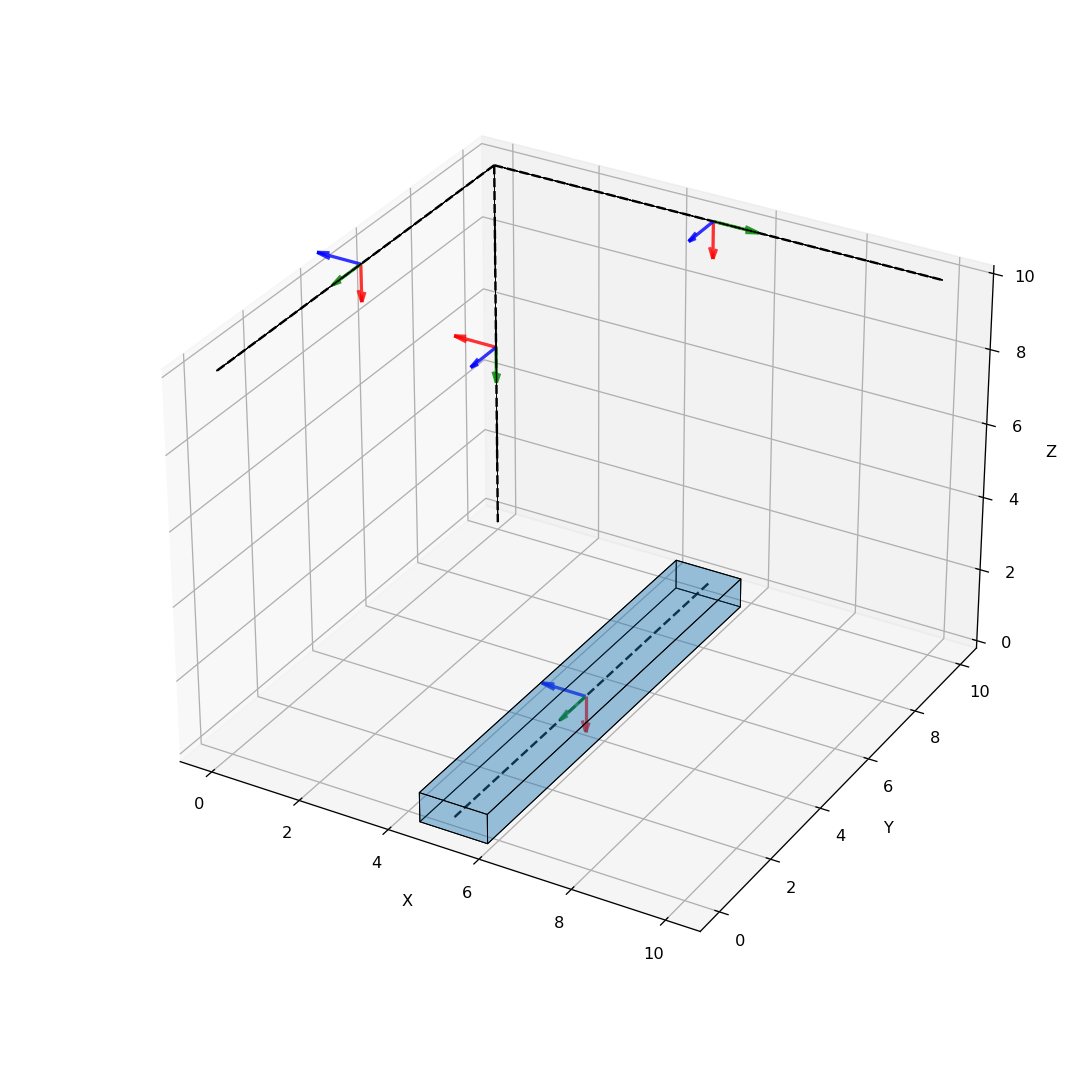

In [14]:
Node1=[5,10,0]
Node2=[5,0,0]
Theta=90
Drawm(Node1, Node2, Theta)